In [45]:
import os
import requests

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Blast.Applications import NcbiblastpCommandline

from scipy.stats import ttest_ind
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay

In [24]:
data = pd.read_csv('../combined_data.csv')

In [26]:
# add amino acid composition
for aa in 'ARNDCQEGHILKMFPSTWYV':
    data['%s_composition' % aa] = (data['sequence'].str.count(aa) / data['sequence'].str.len())

### Generate violin plots for each amino acid composition feature

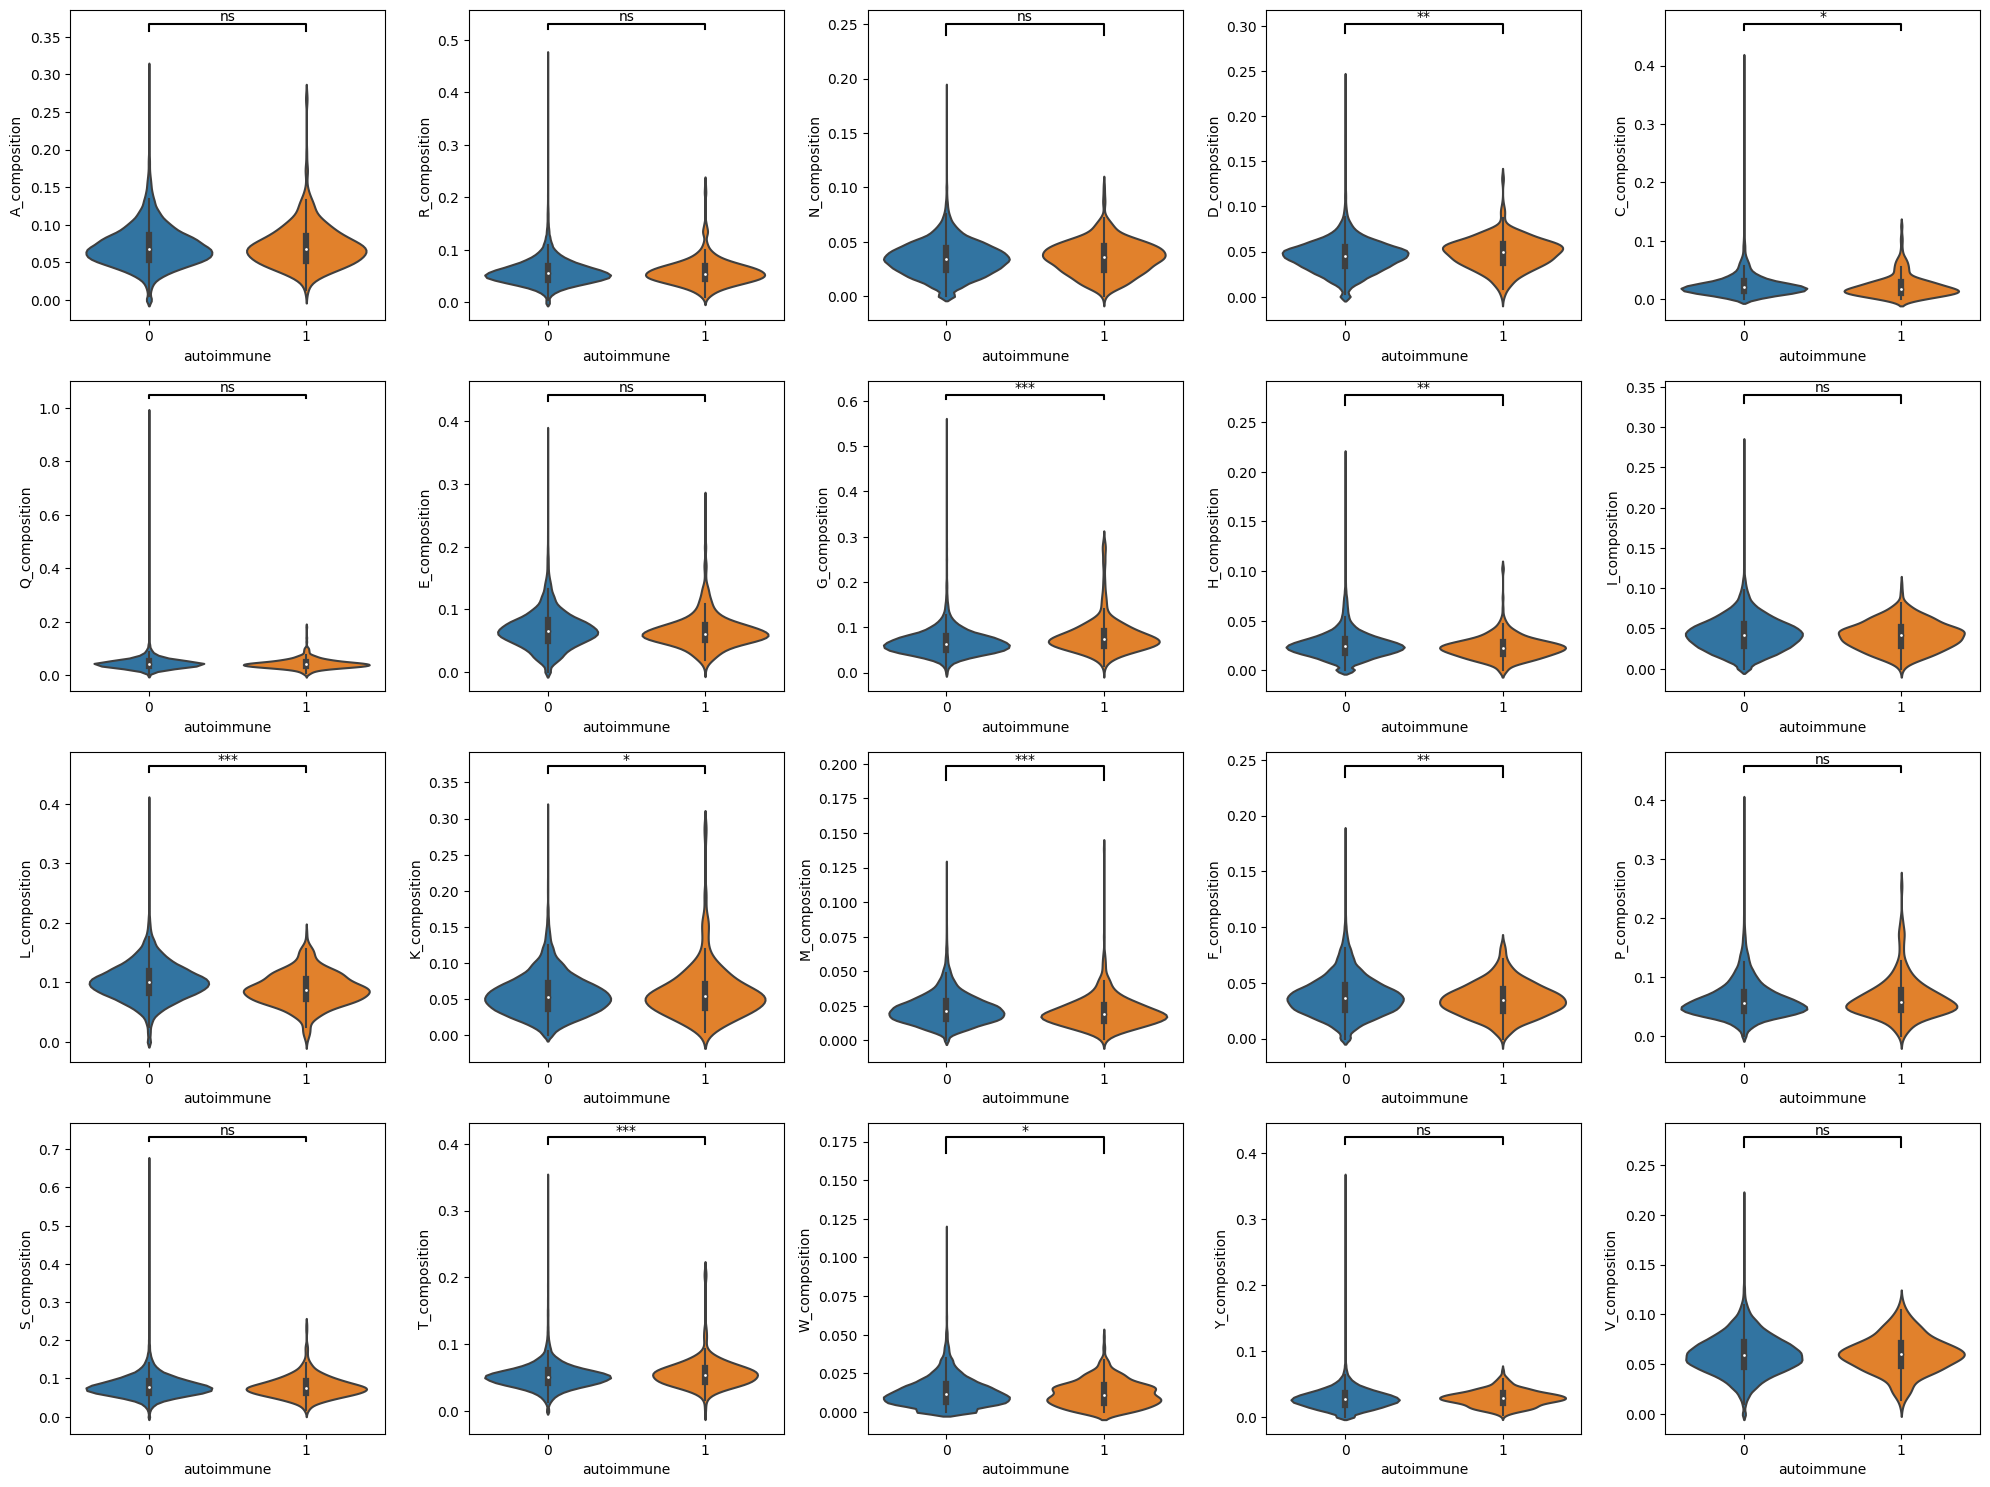

In [37]:
fig, axes = plt.subplots(4, 5, figsize=(20, 15))

for aa, ax in zip('ARNDCQEGHILKMFPSTWYV', axes.flat):
    p = ttest_ind(data[data['autoimmune'].astype(bool)]['%s_composition' % aa], data[~data['autoimmune'].astype(bool)]['%s_composition' % aa])[1]
    if p < 0.0001:
        sig = '***'
    elif p < 0.01:
        sig = '**'
    elif p < 0.05:
        sig = '*'
    else:
        sig = 'ns'
    
    x1, x2 = 0, 1 
    y, h, col = data['%s_composition' % aa].max() + 0.05, 0.01, 'k'
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    ax.text((x1+x2)*.5, y+h, sig, ha='center', va='bottom', color=col)
    
    sns.violinplot(data=data, x='autoimmune', y='%s_composition' % aa, ax=ax)
plt.tight_layout()

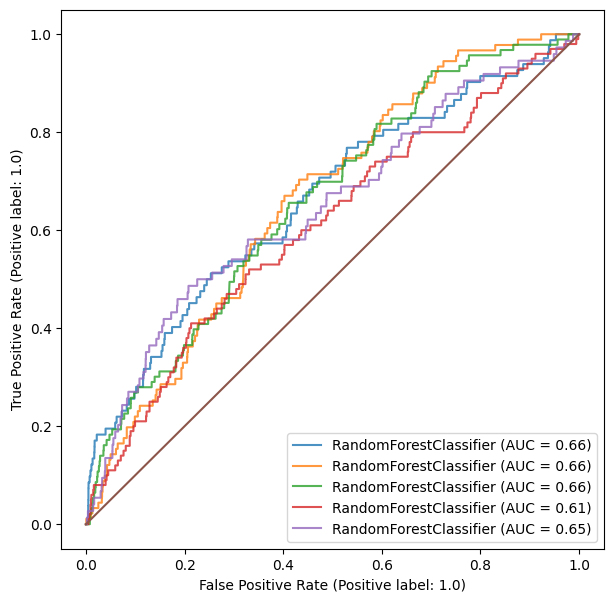

In [9]:
ax = plt.figure(figsize=(7, 7)).gca()
for j in range(1, 6):
    X_train = data[data['fold'] != j].iloc[:, 6:]
    y_train = data[data['fold'] != j]['autoimmune']
    X_test = data[data['fold'] == j].iloc[:, 6:]
    y_test = data[data['fold'] == j]['autoimmune']

    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(X_train, y_train)
    rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax, alpha=0.8)
    
ax.plot([0, 1])